In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
# Import data file
df = pd.read_csv("C:/Python Data/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
# Independent variable Level
x= df['Level'].values
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [21]:
y= df['Salary'].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [25]:
x= x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [45]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x,y)

y_pred_lr = lr_model.predict(x)

Text(0, 0.5, 'Salary')

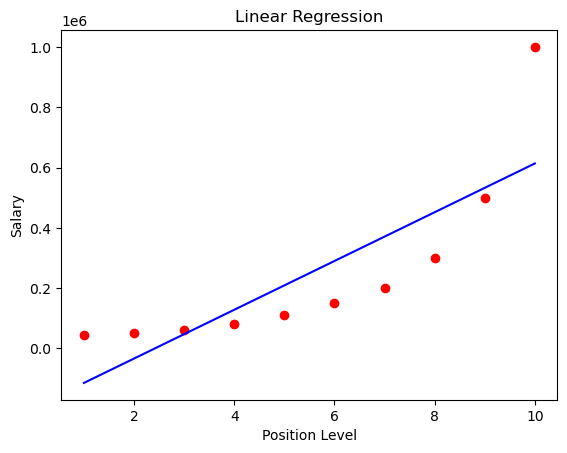

In [47]:
plt.scatter(x,y,color='r')
plt.plot(x,y_pred_lr,color='b')
plt.title("Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

r2_lr = r2_score(y_pred_lr,y)
print("Linear R2 score : ",r2_lr)

mse_lr = np.sqrt(mean_squared_error(y_pred_lr,y))
print("Linear Mean Squared Error: ",mse_lr)

Linear R2 score :  0.5053238120653418
Linear Mean Squared Error:  163388.73519272613


In [63]:
# Applying Polynomial Regression Model

from sklearn.preprocessing import PolynomialFeatures
pr_model = PolynomialFeatures(degree= 3)
y_pred_pr = pr_model.fit_transform(x)

poly_reg = LinearRegression()
poly_reg.fit(y_pred_pr,y)

LinearRegression()

C:\Users\leno\AppData\Local\Temp\ipykernel_19280\1329076238.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)


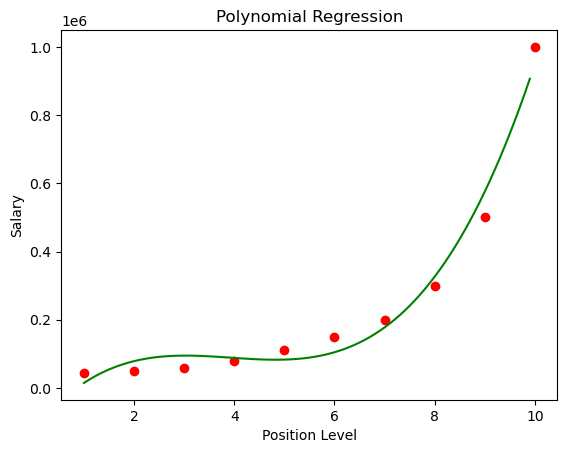

In [71]:
# Polynomial Regression Visualization (smooth curve)
X_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)
plt.scatter(x, y, color='red')
plt.plot(X_grid, poly_reg.predict(pr_model.transform(X_grid)), color='green')
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [77]:
# Predictions
y_pred_pr = poly_reg.predict(pr_model.transform(x))

# R2 Score
r2_pr = r2_score(y, y_pred_pr)

# RMSE
rmse_pr = np.sqrt(mean_squared_error(y, y_pred_pr))

print("Polynomial Regression R2 Score:", r2_pr)
print("Polynomial Regression RMSE:", rmse_pr)


Polynomial Regression R2 Score: 0.9812097727913367
Polynomial Regression RMSE: 38931.504012329184
